In [1]:
import TMA
import DSC
import DMA
import TG
from tkinter import filedialog
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter
plt.rcParams['figure.figsize'] = [5, 4]
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.5  # X軸の目盛り線の幅
plt.rcParams['ytick.major.width'] = 1.5  # Y軸の目盛り線の幅
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['font.size'] = 18

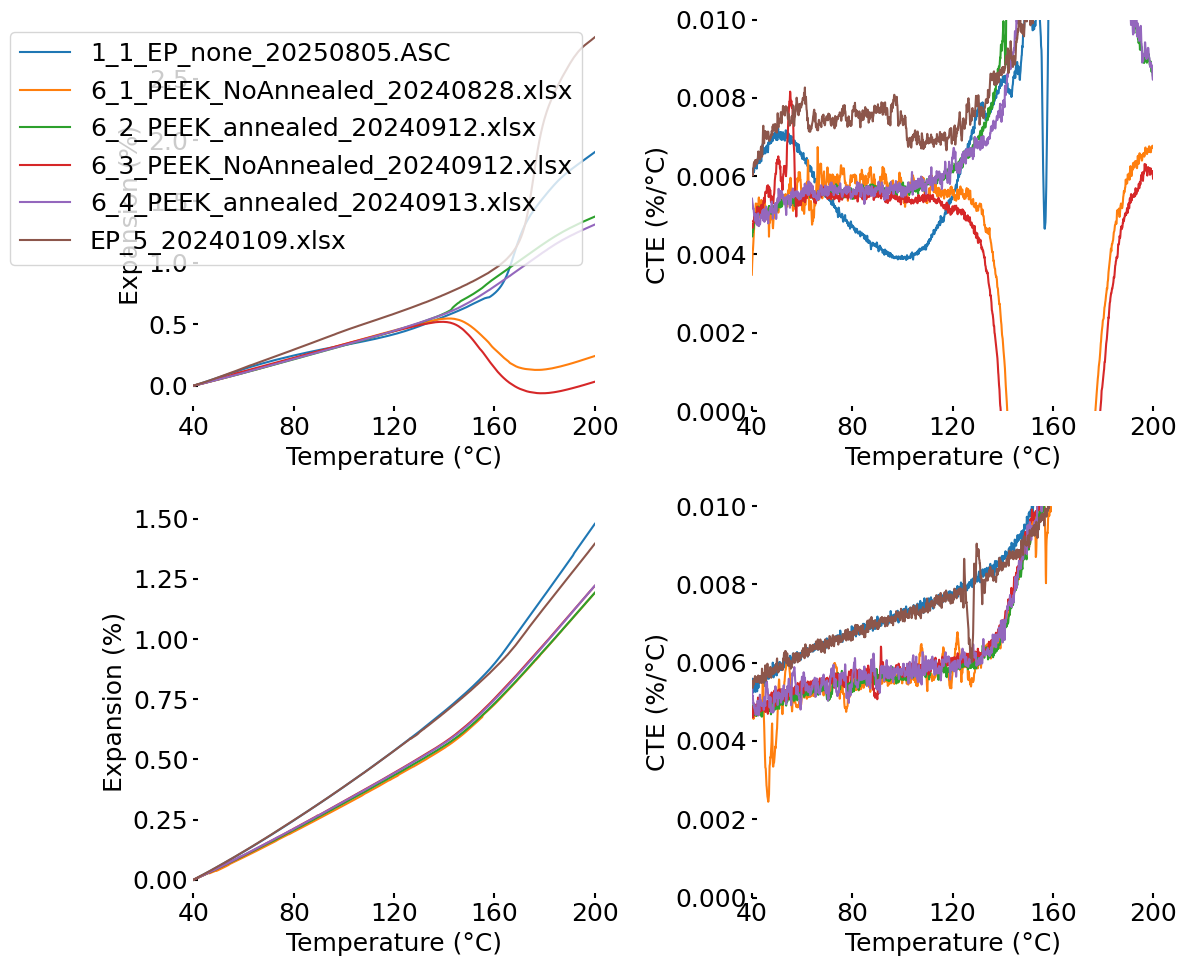

In [28]:
# PEEKとEPのTMA結果を比較するやーつ
# paths = filedialog.askopenfilenames(title="Select files", filetypes=[("All Files", "*.*")])
# datas = [TMA.TMAAnalyzer(path) for path in paths]

fig = plt.figure(figsize=(12, 10))
ax1, ax2 = fig.add_subplot(2, 2, 1), fig.add_subplot(2, 2, 2)
ax3, ax4 = fig.add_subplot(2, 2, 3), fig.add_subplot(2, 2, 4)

savgol_param = 51
savgol_window = 3

for data, path in zip(datas, paths):
    # 1st heating
    segments = data.segments
    segment = segments[0]
    temp = segment['temp']
    tma = segment['tma']
    tma = [t for t, tm in zip(tma, temp) if 40 <= tm <= 200]
    temp = [tm for tm in temp if 40 <= tm <= 200]
    tma = np.array(tma)
    temp = np.array(temp)
    init_length = tma[0] + 20000
    expansion = (tma + 20000 - init_length) / init_length * 100
    ax1.plot(temp, expansion, label=path.split('/')[-1])
    expansion_smooth = savgol_filter(expansion, savgol_param, savgol_window)
    ax2.plot(temp, np.gradient(expansion_smooth, temp), label=path.split('/')[-1])

    # 2nd heating
    segment = segments[1]
    temp = segment['temp']
    tma = segment['tma']
    tma = [t for t, tm in zip(tma, temp) if 40 <= tm <= 200]
    temp = [tm for tm in temp if 40 <= tm <= 200]
    tma = np.array(tma)
    temp = np.array(temp)
    init_length = tma[0] + 20000
    expansion = (tma + 20000 - init_length) / init_length * 100
    ax3.plot(temp, expansion, label=path.split('/')[-1])
    expansion_smooth = savgol_filter(expansion, savgol_param, savgol_window)
    ax4.plot(temp, np.gradient(expansion_smooth, temp), label=path.split('/')[-1])

ax1.set_xlabel('Temperature (°C)')
ax2.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Expansion (%)')
ax2.set_ylabel('CTE (%/°C)')
ax2.set_ylim(0, 0.01)
ax1.set_xlim(40, 200)
ax2.set_xlim(40, 200)
ax1.set_xticks(np.arange(40, 201, 40))
ax2.set_xticks(np.arange(40, 201, 40))

ax3.set_xlabel('Temperature (°C)')
ax4.set_xlabel('Temperature (°C)')
ax3.set_ylabel('Expansion (%)')
ax4.set_ylabel('CTE (%/°C)')
ax4.set_ylim(0, 0.01)
ax3.set_xlim(40, 200)
ax4.set_xlim(40, 200)
ax3.set_xticks(np.arange(40, 201, 40))
ax4.set_xticks(np.arange(40, 201, 40))

ax1.legend()
plt.tight_layout()
plt.savefig(filedialog.asksaveasfilename(defaultextension=".svg"))

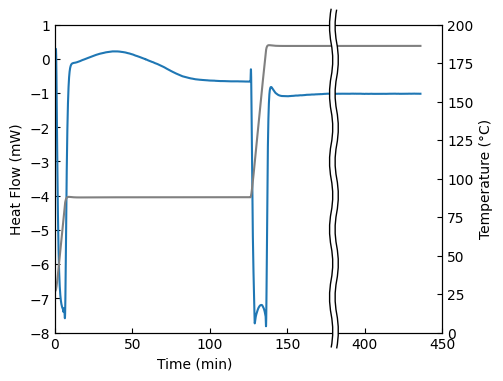

In [78]:
lim_left = 180
lim_right = 380

dsc1 = [d for d, t in zip(dsc_data, time) if t < lim_left]
temp1 = [t for t, tim in zip(temp, time) if tim < lim_left]
dsc2 = [d for d, t in zip(dsc_data, time) if t >= lim_right]
temp2 = [t for t, tim in zip(temp, time) if tim >= lim_right]
time1 = [t for t in time if t < lim_left]
time2 = [t for t in time if t >= lim_right]

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': (lim_left,450-lim_right)} )

fig.subplots_adjust(wspace=0.0)

ax1.plot(time1, dsc1)
ax3 = ax1.twinx()
ax3.plot(time1, temp1, color='gray')
ax2.plot(time2, dsc2)
ax4 = ax2.twinx()
ax4.plot(time2, temp2, color='gray')

ax1.set_xlim(0, lim_left)
ax2.set_xlim(lim_right, 450)
ax1.spines['right'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax4.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('none')
ax3.yaxis.set_ticks_position('none')
ax3.set_ylim(0, 200)
ax4.set_ylim(0, 200)
ax3.set_yticks([])
ax1.set_ylim(-8, 1)

ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Heat Flow (mW)')
ax4.set_ylabel('Temperature (°C)')

# X軸の断裂線を描画するためのパラメータ設定
d1 = 0.05 # X軸のはみだし量
d2 = 0.03 # ニョロ波の高さ
wn = 21   # ニョロ波の数（奇数値を指定）

# ニョロ波の座標パターンを定義
pp = (0,d2,0,-d2)
py = np.linspace(-d1,1+d1,wn)  # Y座標の配列を生成
px = np.array([0+pp[i%4] for i in range(0,wn)])  # X座標の配列を生成（波型パターン）
p = Path(list(zip(px,py)), [Path.MOVETO]+[Path.CURVE3]*(wn-1))  # パスオブジェクトを作成

# 断裂線の外枠（黒色）を作成
line1 = mpatches.PathPatch(p, lw=5, edgecolor='black',
                          facecolor='None', clip_on=False,
                          transform=ax4.transAxes, zorder=10)

# 断裂線の内側（白色）を作成して立体感を演出
line2 = mpatches.PathPatch(p,lw=3, edgecolor='white',
                           facecolor='None', clip_on=False,
                           transform=ax4.transAxes, zorder=10,
                           capstyle='round')

# グラフに断裂線を追加
a = ax4.add_patch(line1)
a = ax4.add_patch(line2)

plt.savefig(filedialog.asksaveasfilename(defaultextension='.svg', filetypes=[('SVG files', '*.svg')]))

In [2]:
paths = filedialog.askopenfilenames(title="Select files", filetypes=[("All Files", "*.*")])

In [3]:
def normalize(data):
    data_min = min(data)
    data_max = max(data)
    normalized_data = [(d - data_min) / (data_max - data_min) for d in data]
    return normalized_data

2_1_EP_80C2h_20250912.ASC: 5.99 mg
2_2_EP_80C2h-10Cmin_20250919.ASC: 6.11 mg
2_3_EP_80C2h-15Cmin_20250919.ASC: 6.11 mg
2_4_EP_80C2h-20Cmin_20250919.ASC: 5.81 mg


Text(0, 0.5, 'Heat Flow (mW/mg)')

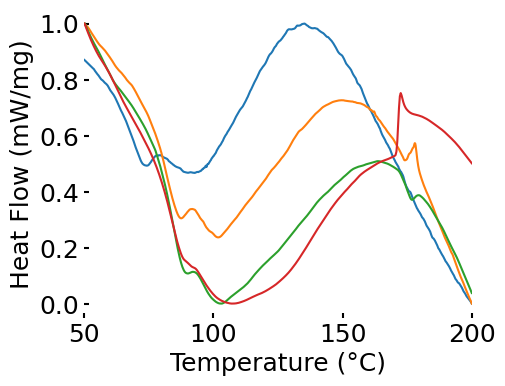

In [10]:
for path in paths:
    data = DSC.DSCAnalyzer(path)
    time = data.segments[0]['time']
    dsc_data = data.segments[0]['dsc']
    temp = data.segments[0]['temp']
    dsc_data = [d for d, t in zip(dsc_data, temp) if 50 <= t <= 200]
    temp = [t for t in temp if 50 <= t <= 200]
    weight = data.weight
    # dsc_data = np.array(dsc_data) / weight * 1000  # mW/mg
    dsc_data = normalize(dsc_data)
    plt.plot(temp, dsc_data, label=path.split('/')[-1])
    print(f"{path.split('/')[-1]}: {weight} mg")
plt.xlabel('Temperature (°C)')
plt.xlim(50, 200)
plt.ylabel('Heat Flow (mW/mg)')
# plt.legend()

In [18]:
txt = '''測定条件	ﾌｧｲﾙ名	装置種別	装置ID	試料名	基準試料名	雰囲気	ｵﾍﾟﾚｰﾀ名	機種名	備考1	備考2	ﾃﾞｨｽｸ保存	自動解析	自動解析ﾌｧｲﾙ名	試料重量(mg)	試料容器	試料長	試料形状	半径(mm)	横(mm)	縦(mm)	基準試料長(mm)	TMA荷重(mN)	水平補正／荷重補正長(mm)
#MC	"C:/TpEvo/Data/yamauchi/TMA.MCD"	0	---	"ep"	""	"N2"	"yamasho"	""	""	""	1	0	""	5.990000	"Al"	20.000000	四角	5.000000	2.000000	0.211000	10.000000	126.604515	15.000000'''
txt = txt.split('\n')
j = -1
for lines in txt:
    lines = lines.split('\t')
    for i, line in enumerate(lines):
        if i == j:
            print(f'Sample weight: {lines[i]} mg')
        if '重量' in line:
            j = i

Sample weight: 5.990000 mg


In [12]:
txt

['測定条件\tﾌｧｲﾙ名\t装置種別\t装置ID\t試料名\t基準試料名\t雰囲気\tｵﾍﾟﾚｰﾀ名\t機種名\t備考1\t備考2\tﾃﾞｨｽｸ保存\t自動解析\t自動解析ﾌｧｲﾙ名\t試料重量(mg)\t試料容器\t試料長\t試料形状\t半径(mm)\t横(mm)\t縦(mm)\t基準試料長(mm)\tTMA荷重(mN)\t水平補正／荷重補正長(mm)',
 '#MC\t"C:/TpEvo/Data/yamauchi/TMA.MCD"\t0\t---\t"ep"\t""\t"N2"\t"yamasho"\t""\t""\t""\t1\t0\t""\t5.990000\t"Al"\t20.000000\t四角\t5.000000\t2.000000\t0.211000\t10.000000\t126.604515\t15.000000']